In [1]:
import matplotlib.pyplot as plt
import numpy as np
from synthesizer import *

# Calculate Envelope

In [2]:
envelope = ADSREnvelope(0.1, 0.1, 0.5, 0.1)
t_press = 0
t_peak = t_press + envelope.attack
t_sustain = t_press + envelope.attack + envelope.decay
t_release = 0.5
t_padding = 0.1
t_range = np.linspace(t_press - t_padding, t_release + envelope.release + t_padding, 500)

In [3]:
envelope_values = calculate_envelope(t_range, t_press, t_release, envelope)

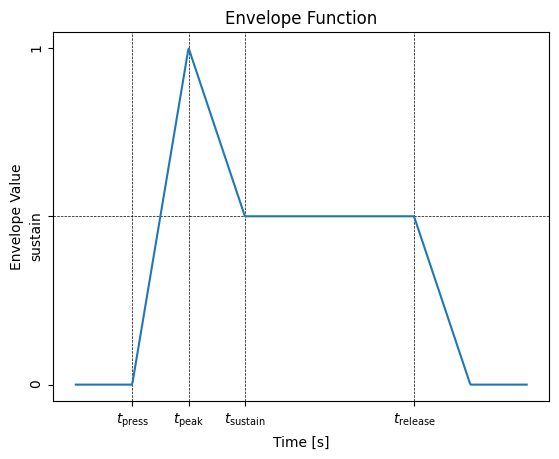

In [4]:
plt.figure()

plt.plot(t_range, envelope_values)

grid_parameters = {'color': 'k', 'linewidth': 0.5, 'linestyle': 'dashed', 'zorder': -1}
for t in [t_press, t_peak, t_sustain, t_release]:
    plt.axvline(t, **grid_parameters)
plt.axhline(envelope.sustain, **grid_parameters)

plt.xticks([
    t_press,
    t_peak,
    t_sustain,
    t_release
], labels=[
    r'$t_\mathrm{press}$',
    r'$t_\mathrm{peak}$',
    r'$t_\mathrm{sustain}$',
    r'$t_\mathrm{release}$'
])
plt.yticks([0, envelope.sustain, 1], labels=['0', 'sustain', '1'], rotation=90)

plt.xlabel('Time [s]')
plt.ylabel('Envelope Value')
plt.title('Envelope Function')

plt.show()

# Calculate Oscillator

In [5]:
freq = 440  # Hz
period = 1 / freq
t = np.linspace(0, 2 * period, 500)
waveforms_to_plot = [Waveform.SINE, Waveform.TRIANGLE, Waveform.SQUARE, Waveform.NOISE]

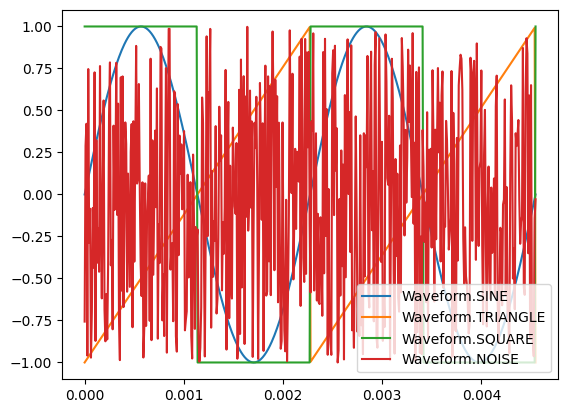

In [8]:
plt.figure()

for waveform in waveforms_to_plot[::-1]:
    plt.plot(t, calculate_oscillator(t, freq, waveform), label=f'{waveform}')

plt.legend(loc=4)

plt.show()